# Reinforcement learning basics

Notes for the following lecture:

- [Lecture Video](https://www.youtube.com/watch?v=2pWv7GOvuf0&list=PLzuuYNsE1EZAXYR4FJ75jcJseBmo4KQ9-)
- [Lecture Slides](https://davidstarsilver.wordpress.com/wp-content/uploads/2025/04/intro_rl.pdf)



## What is reinforcement learning?
It is the process by which an agent learns to maximize reward in a given environment.
Reinforcement learning deals with problems that involves sequential decisions by an agent, where after every decision taken the agent gets a specific reward.

## How is reinforcement learning different than other types of learning?
- Unlike supervised learning, there is no supervisor in reinforcement, the agent only gets a reward signal that just indicates how well the agent did in a particular setting. No supervisor tells the agent how to maximize reward (unlike supervised learning). If there is a supervisor gives the agent an example of optimal trajectories and the agent uses those to learn, then that's called imitation learning.
- The assumption that each data sample is independently and identically distributed or i.i.d (the assumption we make in supervised and unsupervised learning), this assumption doesn't hold in reinforcement learning, because different data samples may be conditioned on each other for example. Time matters in RL problems (sequential decision making), and the agent's action affects subsequent data it receives (hence why we can't have i.i.d assumption)
- Also in reinforcement, the feedback is often delayed, i.e. when taking a specific action, you may not necessarily know the consequences of taking such action until later on (when the RL episode is done)


## Components of Reinforcement Learning

The agent environment interaction:

<div align="center">
    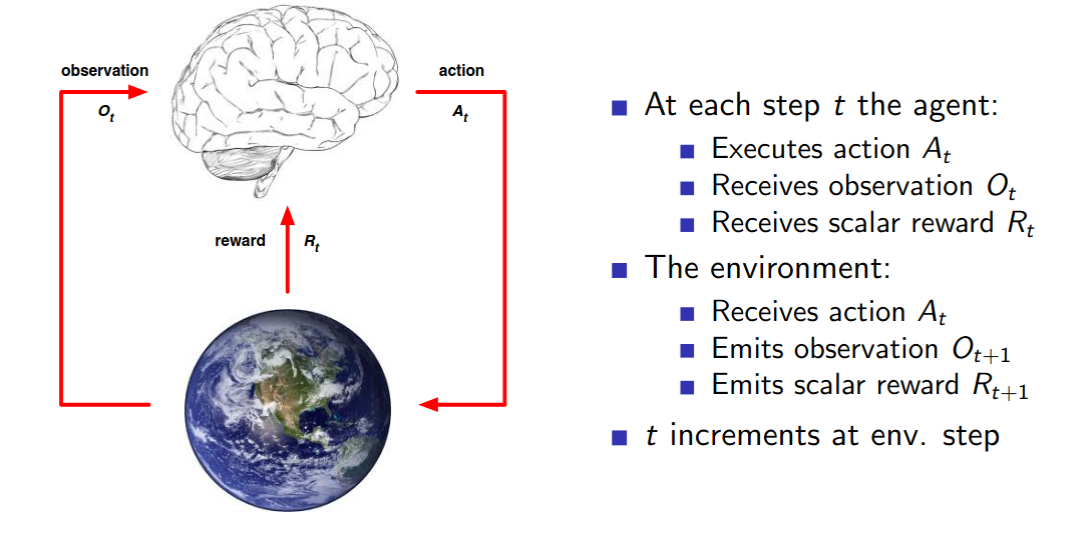
</div>:

### Reward 

The is a scalar signal that the agent receives in every time step. The agent's objective is to maximize cumulative rewards. The reward signal can describe any goal. For example for an investment portfolio, the objective may be to maximize the total return while minimizing risk. You can then create a scalar value that balances between return and risk.

### State

The state is all the information needed to determine what happens next. It is what the agent uses to make the next decision. If the state is fully observed (like in an MDP), then:

$$
O_t = S_t^e = S_t^a
$$

Where the observations of the agent $O_t$ are equal to the state of the entire environment $S_t^e$ which is equal to the state the agent stores inside of it $S_t^a$ and is used to make the next decision.

If the environment is not fully observable (i.e. $O_t \neq S_t^e$), hence the agent will have to construct a belief of what the enviroment state is (which is $S_t^a$). That state could be either of:

1. The complete history $S_t^a = H_t$, where the history is $H_t = O_1, R_1, A_1, ...,A_{t-1}, O_t, R_t$
2. Beliefs of the environment state: $S_t^a = (P[S_t^e=s^1], ..., P[S_t^e = s^n])$
3. other forms of representing beliefs of the environment state $S_t^a = f(H_t)$

**Markov State**:

An information state (aka a Markov state) contains all useful information from the history

A state is Markov if:
$$
P[S_{t+1}|S_t] = P[S_{t+1}|S_1, ..., S_t]
$$

This means that the current state $S_t$ is a sufficient descriptor of the entire history, or in other words: The future is independent of the past given the present. Once the current state is known, the whole history can be thrown away.


See the below equation, the entire past leads to the current state, and the entire future stems from the current state. The future doesn't depend on the past given the present state.
$$
H_{1:t} \rightarrow S_t \rightarrow H_{t+1:\infty}
$$


**Markov Decision Process**: The environment is fully observable, and the state is markov.

**Partially observable Markov decision process (POMDP)**: The environment is partially observable, and the agent state is markov.



### Policy

The policy is a mapping between the agent's state and action. The policy can be defined as:

$$
a = \pi(s)
$$

The policy could also be stochastic:

$$
P[A_t = a | S_t = s] = \pi(a|s)
$$


### Value Function

The total future cumulative rewards at any given state, following a given policy (or transition dynamics).
The value function determines the goodness or badness (or value) of being at a specific state. It can be represented as:

$$
v_{\pi}(s) = E_{\pi}[R_{t+1} + \gamma R_{t+2} + \gamma R_{t+3} + ... | S_t = s]
$$

### Model

The agent's representation of how the environment works. A model can be used for prediction (predicting what the environment will do next), or planning (planning a trajectory in the environment knowing how the environment works). The model predicts the next state, and the next reward.

The model is optional, i.e. we don't have to have a model to solve the reinforcement learning problem. 
There are model-free approaches to RL, where we learn from experience (let the agent do things in the environment, then map out good action at a given state just from what the agent has experienced at that given state).

Here is the formalization of the model:

$$
P_{ss'}^a = P[S_{t+1} = s'| S_t = s, A_t = a]
$$
$$
R_s^a = E[R_{t+1} | S_t = s, A_t = a]
$$



## Types of Reinforcement Learning

### Model Free

The model of the environment is unknown. We only have access to the policy and the value function.
Can't do planning (can't plan out a trajectory in the environment). The agent can only act at a given state and has to wait for the environment state to propagate before it can see the reward of the action it has taken.

This is the pure reinforcement learning problem, similar to how humans and animals learn.

It is like trial and error learning.

### Model-based

Can have a model of the environment, which can be used for predicting what the environment will do next. This model can be used for planning, i.e. planning ahead a sequence of actions followed by predictions on what the environment will do next.


### Prediction vs. control

Prediction involves evaluating a policy into the future. Just purely unrolling the policy actions into the future and see how it behaves and what rewards we get.

Control is optimizing the policy for the future, i.e. finding the optimal policy.




# Markov Decision Processes

Notes for the following lecture:    
[Lecture Notes](https://www.youtube.com/watch?v=lfHX2hHRMVQ)     
[Lecture Slides](https://davidstarsilver.wordpress.com/wp-content/uploads/2025/04/lecture-2-mdp.pdf)


## What is an MDP?

A markhov desicion process is a process that describes an environment in which an agent can act. An MDP is **fully observable** (meaning that the agent knows everything about the state of the environment).

Almost all RL problems can be converted into some form of MDP (even partially observable ones).


## The Markov Property

As described in the previous lecture, the markov property of the state where:

$$
P[S_{t+1}|S_t] = P[S_{t+1}|S_1, ..., S_t]
$$

Meaning that the future is only conditioned on the present not the past. The future only depends on the present and is independent of the past. The present state contains all the relevent information to determine the future. Once the present state is known the entire history can be thrown away (i.e. the current state is a sufficient statistic of the future).

## The Markov Process

A Markov process is a random process with some transition dynamics. A Markov process involves state transitions from one state ot the other. $S_1 \rightarrow S_2 \rightarrow ... S_n$

The definition of the Markhov process involes defining:
1. $S$ is a finite set of states
2. $P$ is a state transition probability matrix: $P_{ss'} = P[S_{t+1} = s' | S_t = s]$


Below is an example of a markov process. Our state is the location of the agent on the grid (x, y indices).

In [2]:
# Let's create an example of a markov
import numpy as np
import random

N = 10 # grid size nxn

actions = [ np.array([1, 0]), # right
            np.array([0, 1]), # up
            np.array([-1, 0]), # left
            np.array([0, -1])] # down

# Random policy that equally balances between actions
action_probabilities = [0.25, 0.25, 0.25, 0.25]


def markov_process(s, N, actions, action_probabilities):
    index = np.random.choice(len(actions), p=action_probabilities)
    action = actions[index]
    return np.clip(s + action, 0, N -1)
    

# Initialize state randomly
state = np.array([random.randint(0, N - 1), random.randint(0, N - 1)])
print(state)
for _ in range(3):
    # Transtion from state s to state s'
    state = markov_process(state, N, actions, action_probabilities)
    print(state)

[3 2]
[4 2]
[4 3]
[4 4]


## Markov Reward Process

Similar to the Markov process, but with the addition of rewards. The markov reward process involves the following:
1. $S$ is a finite set of states
2. $P$ is a state transition probability matrix: $P_{ss'} = P[S_{t+1} = s' | S_t = s]$
3. $R$ is a reward function where $R_s = E[R_{t+1} | S_t = s]$
4. $\gamma$ is a discount factor, $\gamma \in [0,1]$


One could ask what's the need for the discount factor:
1. Makes mathematics easy (reward doesn't explode to infinity for non-terminating or cyclical MDPs
2. Discount factor represents uncertainty in future rewards, this mimics natural human behavior
3. If the sequences are guaranteed to terminate then you could use a discount factor equal to 1

Below is an example of a markhov reward process

In [3]:
rewards = [-1, # reward for moving right
           -1, # reward for moving up
           -1, # reward for moving left
           -1] # reward for moving down

def markov_reward_process(s, N, actions, action_probabilities, rewards):
    index = np.random.choice(len(actions), p=action_probabilities)
    action = actions[index]
    reward = rewards[index]
    return np.clip(s + action, 0, N -1), reward


# Initialize state randomly
state = np.array([random.randint(0, N - 1), random.randint(0, N - 1)])
print(state)
for _ in range(3):
    # Transtion from state s to state s'
    state, reward = markov_reward_process(state, N, actions, action_probabilities, rewards)
    print(state, "reward for just taking this action",reward)

[9 6]
[9 5] reward for just taking this action -1
[9 4] reward for just taking this action -1
[9 4] reward for just taking this action -1


Now let's define the return or the value

$$
G_t = R_{t+1} + \gamma R_{t+2} + ... = \Sigma_{k=0}^{\inf} \gamma^k R_{t+k+1}
$$

if the value of $\gamma$ is close to zero this leads to "myopic" evaluation    
if the valye of $\gamma$ is close to 1 this leads to "far-sighted" evaluation

We can now define the value function,

## Value Function
The value function is defined as

$$
v(s) = E[G_t|S_t = s]
$$

The above is called the state value function.

The value function represents the goodness of being at a specific state, it means the sum of discounted rewards that could be achieved at that state.

A recursive relationship can be defined using the value function forming the bellman equation

## Bellman Equation
The bellman equation defines a recursive relationship between the value function and itself.

$$
v(s) = E[R_{t+1} + \gamma v(S_{t+1}) | S_{t} = s]
$$

You could think of it using the following backup diagram

<div align="center">
    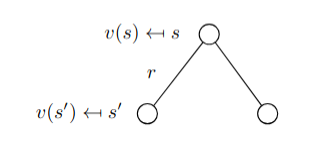
</div>


The Bellman equation can also be defined in matrix form:

$$
v = R + \gamma P v
$$

Where $P$ is the transition probability

You could then solve the bellman equation:

$$
v = (1 - \gamma P)^{-1} R
$$

In [32]:
# Let's attempt solving for the value function in matrix form
# Consider the below example where you have 3 states
#  S1 -> S2 -> S3


# Let's build the state vector

R = np.array([-10, -10, 0])
R = R.reshape((3,1))

gamma = 0.999999999

P = np.array([[0, 1, 0],
              [0, 0, 1],
              [0, 0, 1]])


v = np.linalg.inv(np.eye(3,3) - gamma * P).dot(R)

v

array([[-19.99999999],
       [-10.        ],
       [  0.        ]])

## Markov Decision Process

The Markov decision process is the same as the markov reward process but with the introduction of actions into the picture. You have the following elements in a markov reward process:
1. $S$ is a finite set of states
2. $A$ is a finite set of actions
3. $P$ is a state transition probability matrix $P_{ss'}^a = P[S_{t+1} = s' | S_t = s, A_t = a]$
4. $R$ is a reward function, $R_s^a = E[R_{t+1} | S_t = s, A_t = a]$
5. $\gamma$ is a discount factor $\gamma \in [0,1]$


### Policy
In a markov decision process we're trying to determine the policy.

$$
\pi
$$
